# Analysis on Concrete Slump Test Data Set from UCI ML Repository

### Author: Anubhav Chaturvedi

# Task Description

Use the Concrete Slump Test data set found on the UCI: data file and variable names can all be found on the UCI site. 

Data should be loaded from the website directly and not imported from a local drive. 

The dataset includes seven input measurement features and three output measurements.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data')

In [3]:
#Checking dimensionality (the number of rows and columns together) of the DataFrame

df.shape

(103, 11)

In [4]:
df.columns

Index(['No', 'Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [5]:
#We do not need the 'No' column so let us remove it from the data frame

df.drop(['No'],axis=1,inplace=True)

In [6]:
#Let us see how our top rows look like

df.head()

Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  SLUMP(cm)  \
0   273.0   82.0    105.0  210.0   9.0         904.0       680.0       23.0   
1   163.0  149.0    191.0  180.0  12.0         843.0       746.0        0.0   
2   162.0  148.0    191.0  179.0  16.0         840.0       743.0        1.0   
3   162.0  148.0    190.0  179.0  19.0         838.0       741.0        3.0   
4   154.0  112.0    144.0  220.0  10.0         923.0       658.0       20.0   

   FLOW(cm)  Compressive Strength (28-day)(Mpa)  
0      62.0                               34.99  
1      20.0                               41.14  
2      20.0                               41.81  
3      21.5                               42.08  
4      64.0                               26.82

In [7]:
#Since we would be using these names a lot let us keep shorter names with no capital letters or spaces

df = df.rename(columns = {
    'Cement':'cement',
    'Slag':'furnace_slag', 
    'Fly ash':'fly_ash', 
    'Water':'water', 
    'SP':'super_plasticizer', 
    'Coarse Aggr.':'coarse_agg',
    'Fine Aggr.':'fine_agg', 
    'SLUMP(cm)':'slump', 
    'FLOW(cm)':'flow',
    'Compressive Strength (28-day)(Mpa)': 'compressive_strength'})

In [8]:
#check types of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
cement                  103 non-null float64
furnace_slag            103 non-null float64
fly_ash                 103 non-null float64
water                   103 non-null float64
super_plasticizer       103 non-null float64
coarse_agg              103 non-null float64
fine_agg                103 non-null float64
slump                   103 non-null float64
flow                    103 non-null float64
compressive_strength    103 non-null float64
dtypes: float64(10)
memory usage: 8.1 KB


In [9]:
#check for nulls

print(df.isnull().sum())

cement                  0
furnace_slag            0
fly_ash                 0
water                   0
super_plasticizer       0
coarse_agg              0
fine_agg                0
slump                   0
flow                    0
compressive_strength    0
dtype: int64


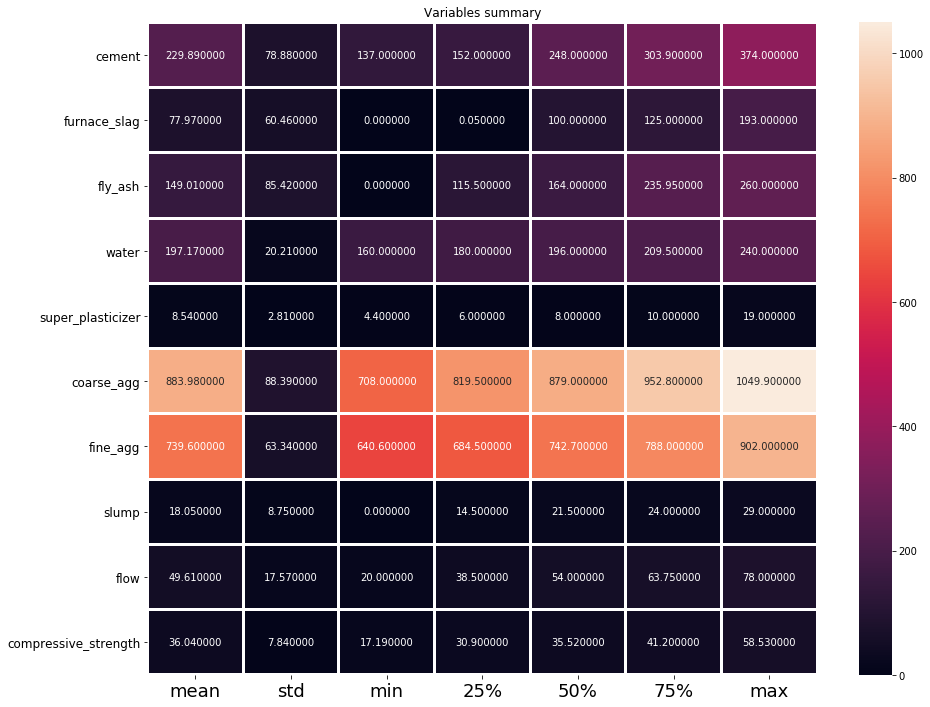

In [10]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

## Compressive strength Distribution

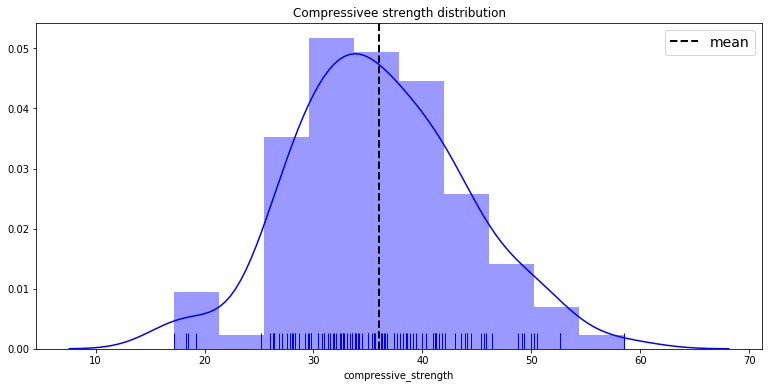

In [11]:
plt.figure(figsize=(13,6))
sns.distplot(df["compressive_strength"],color="b",rug=True)
plt.axvline(df["compressive_strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressivee strength distribution")
plt.show()

## Slump Distribution

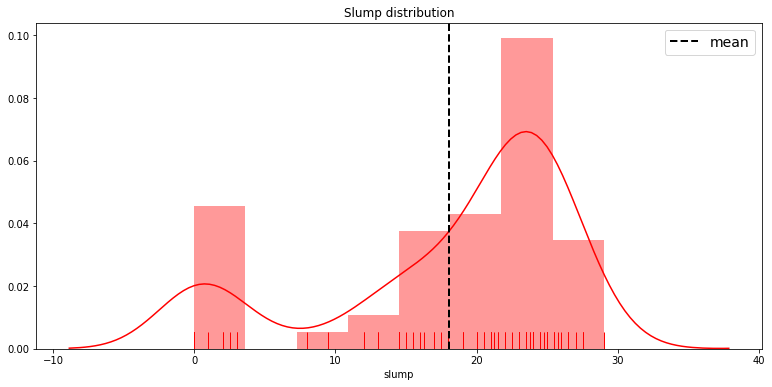

In [12]:
plt.figure(figsize=(13,6))
sns.distplot(df["slump"],color="r",rug=True)
plt.axvline(df["slump"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Slump distribution")
plt.show()

## Flow Distribution

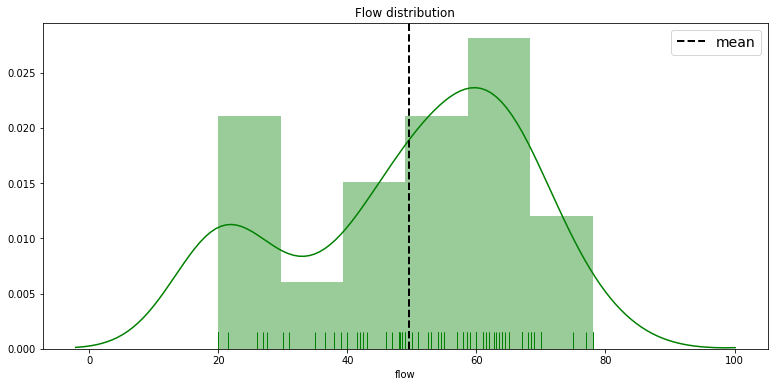

In [13]:
plt.figure(figsize=(13,6))
sns.distplot(df["flow"],color="g",rug=True)
plt.axvline(df["flow"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Flow distribution")
plt.show()

## Ingredients Distribution

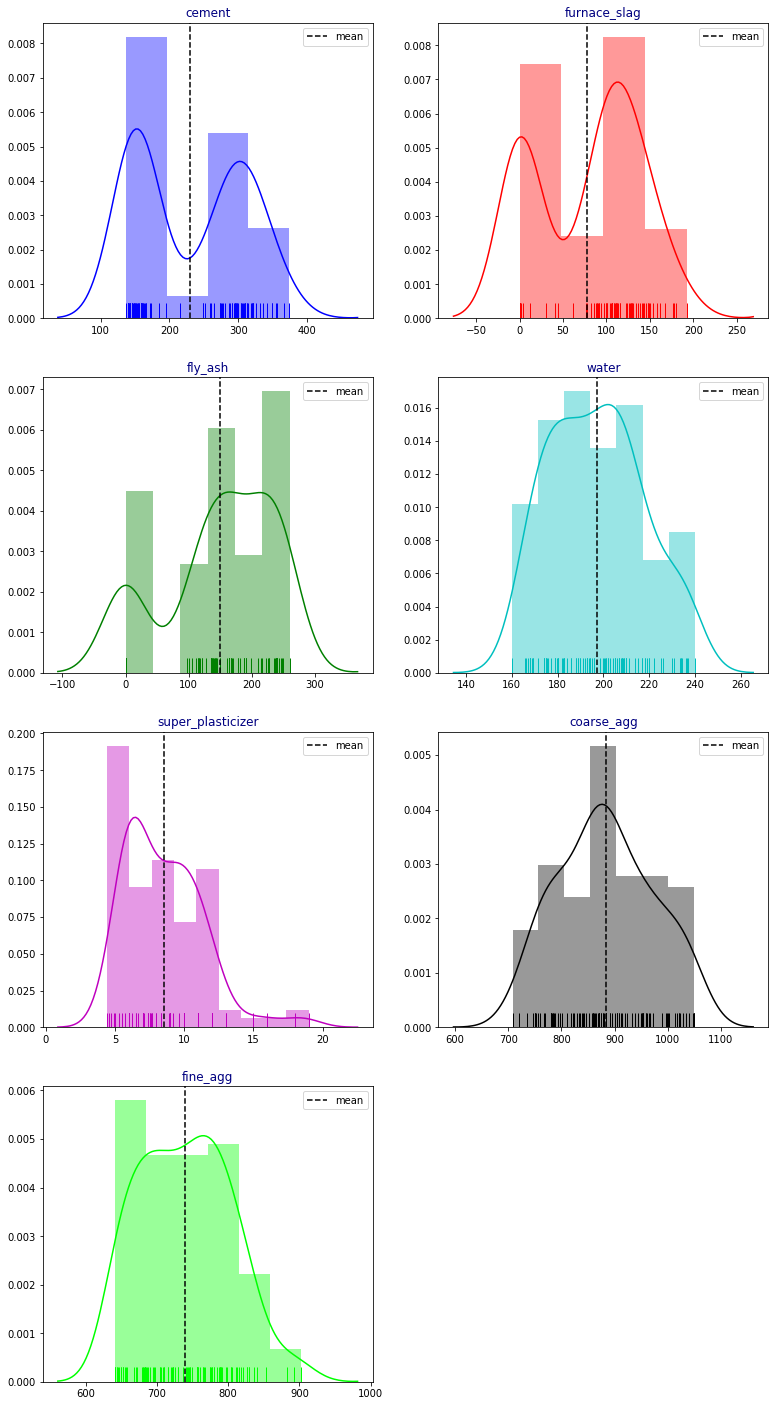

In [14]:
import itertools

cols = ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer','coarse_agg', 'fine_agg']
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

# Questions - Part 1

First, conduct an exploratory data analysis (EDA) on the ten variables included in the dataset. 

Generate some visual representations to illustrate the characteristics of the data.

### •	In plain English, explain your exploratory analysis process and what you observed about the data.

to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.



### •	In plain English, explain the visual representations you generated and what they reveal about the data structure.

### •	In plain English, explain how findings from the exploratory analysis might influence additional analyses.

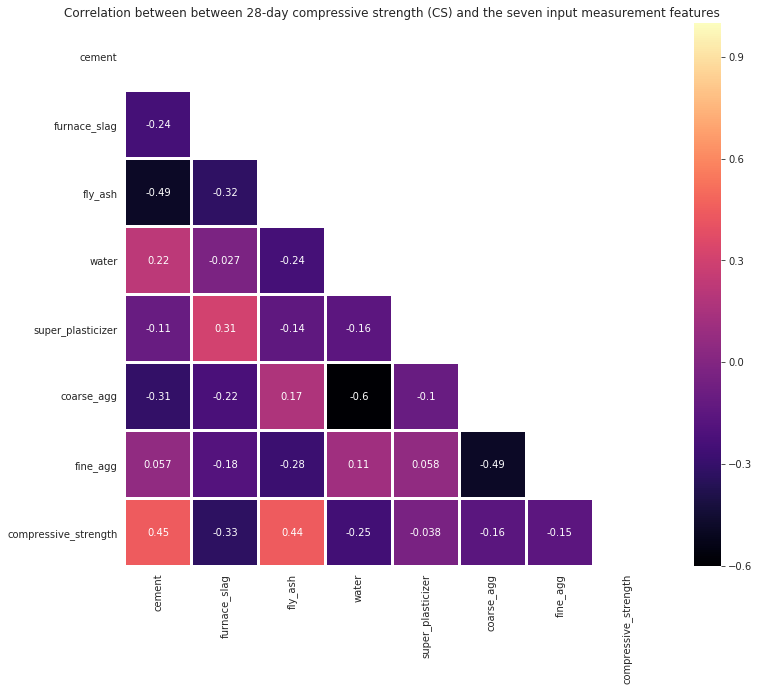

In [15]:
#For second group of questions we need to explore relationship between 7 ingredients and compressive strength. 
#So let us create a new dataframe with the required information

df1= df[['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer',
         'coarse_agg', 'fine_agg','compressive_strength']]

cor = df1.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))

with sns.axes_style("white"):
    sns.heatmap(cor,annot=True,linewidth=2,
                mask = mask,cmap="magma")
plt.title("Correlation between between 28-day compressive strength (CS) and the seven input measurement features")
plt.show()

In [16]:
#In order to make this easier to interpret, stratify CS into bins in order to make your visual 
#representations easier to interpret.

df1['cs_binned'] = pd.cut(df['compressive_strength'], bins=12, labels=False).values

In [17]:
del df1['compressive_strength']

In [18]:
df1.head()

cement  furnace_slag  fly_ash  water  super_plasticizer  coarse_agg  \
0   273.0          82.0    105.0  210.0                9.0       904.0   
1   163.0         149.0    191.0  180.0               12.0       843.0   
2   162.0         148.0    191.0  179.0               16.0       840.0   
3   162.0         148.0    190.0  179.0               19.0       838.0   
4   154.0         112.0    144.0  220.0               10.0       923.0   

   fine_agg  cs_binned  
0     680.0          5  
1     746.0          6  
2     743.0          7  
3     741.0          7  
4     658.0          2

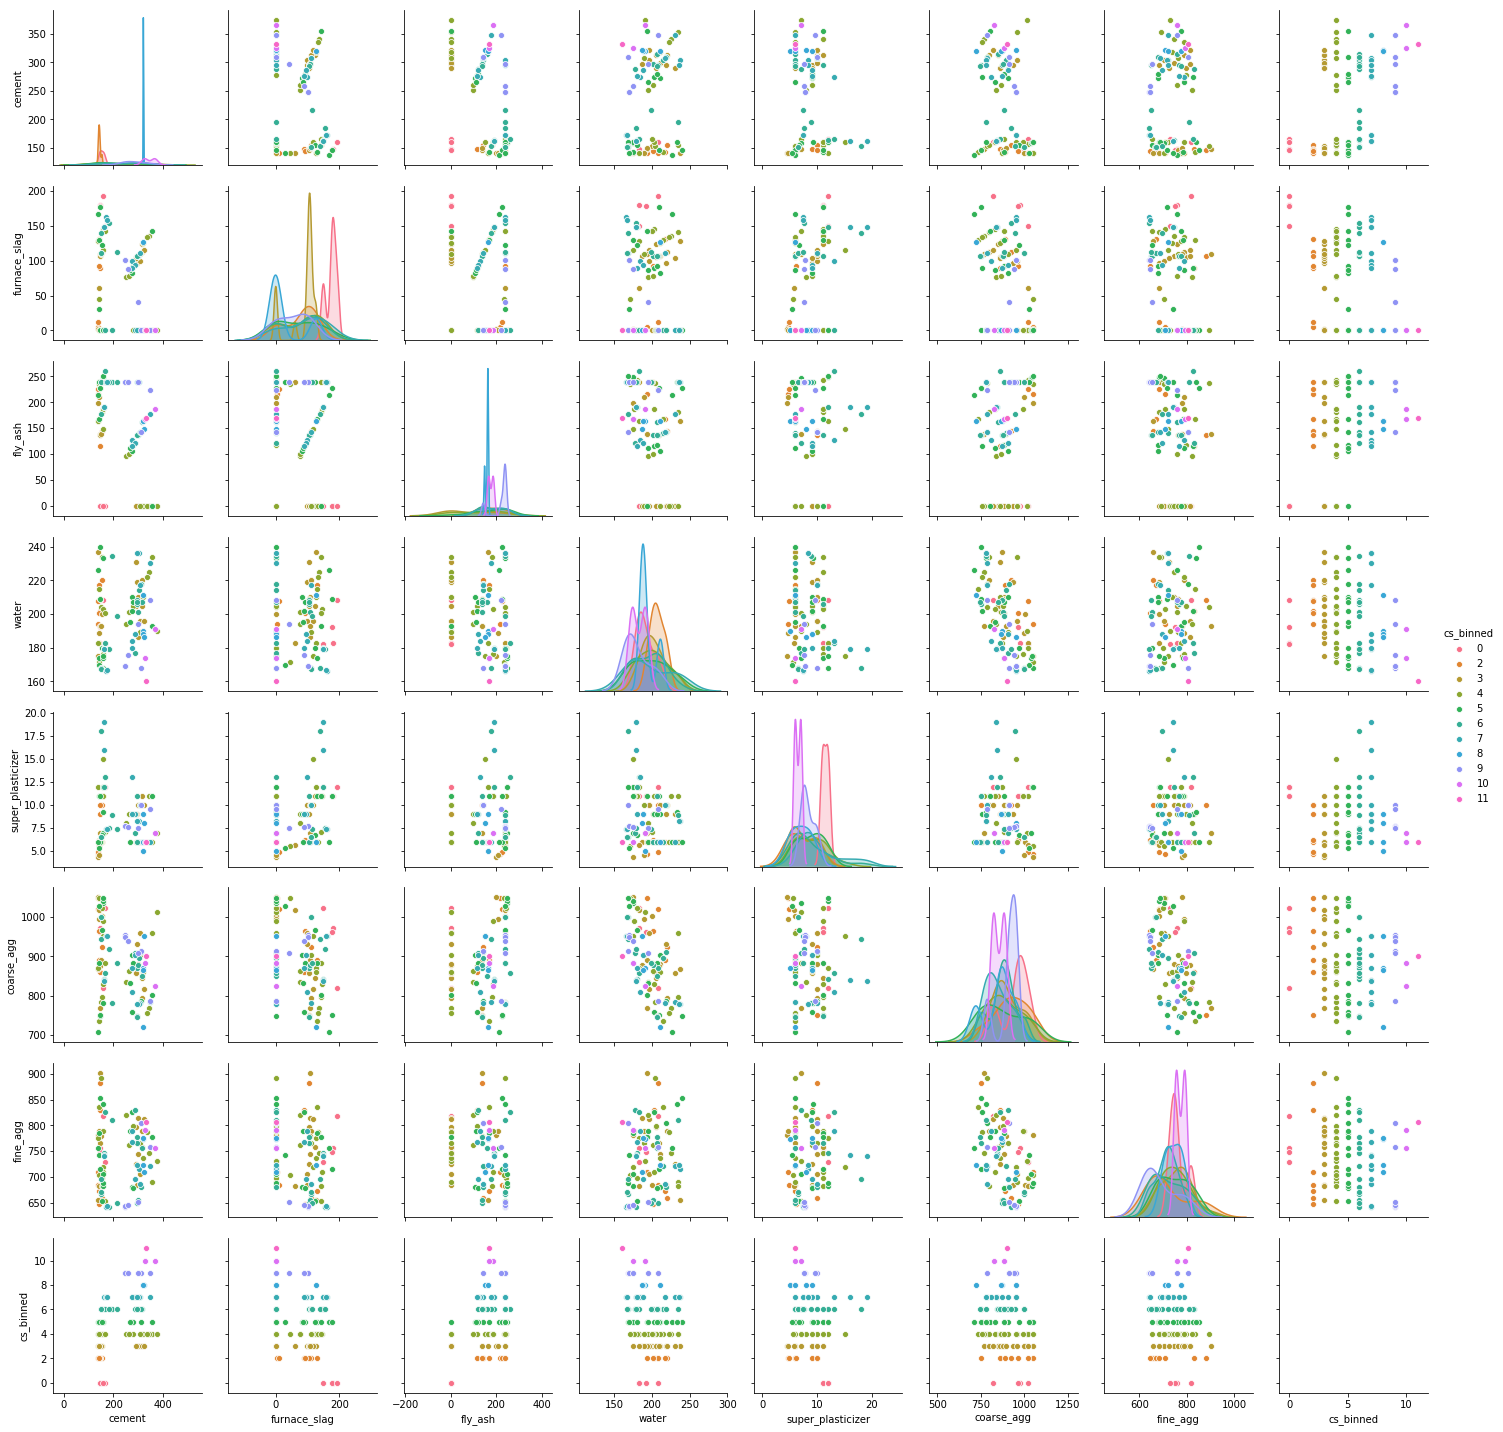

In [19]:
sns.pairplot(df1, 
             hue='cs_binned', 
             palette="husl")

## Contour plot between 7 ingredients and compressive strength

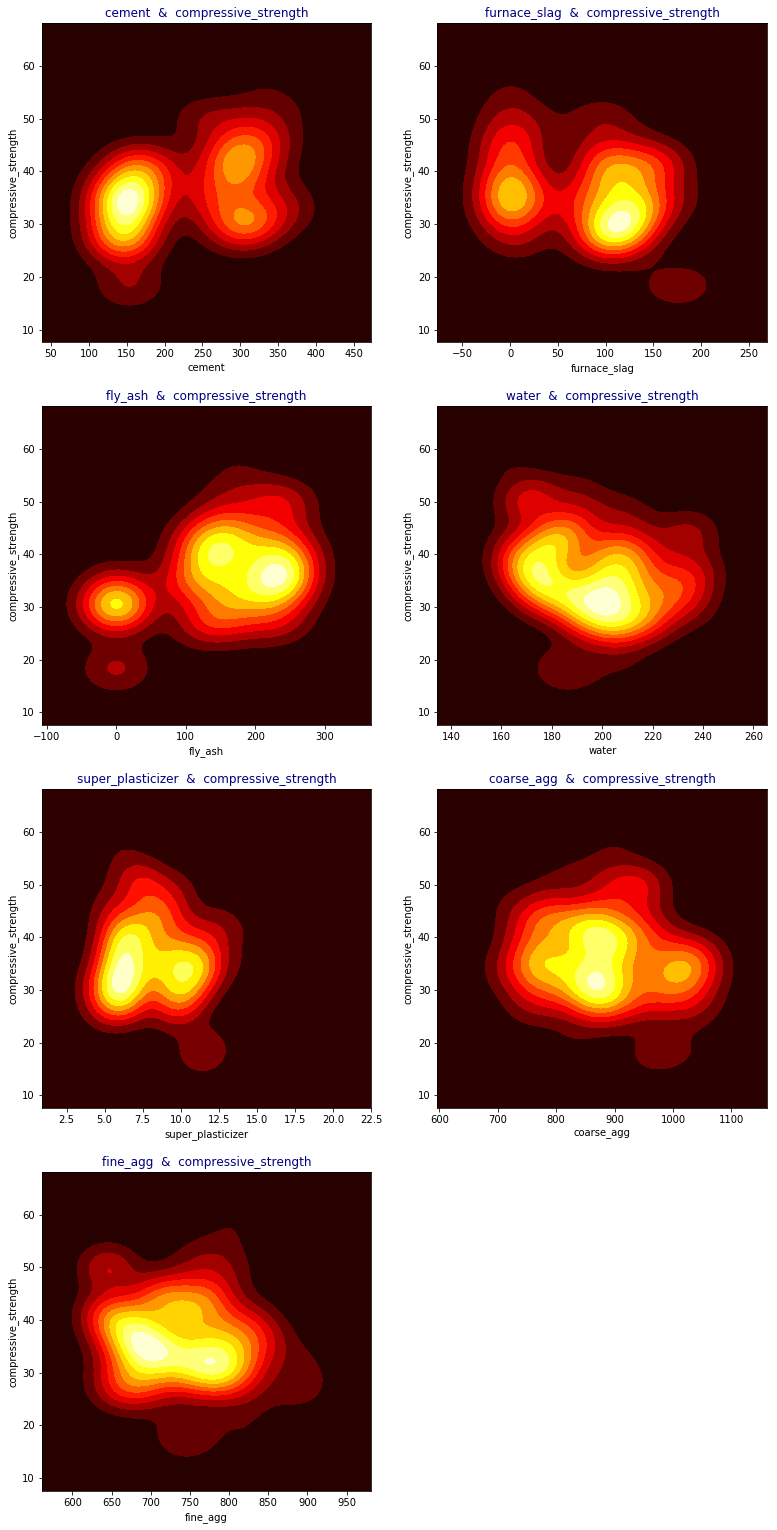

In [20]:
cols = ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer','coarse_agg', 'fine_agg']
length = len(cols)

plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.kdeplot(df[i],
                df["compressive_strength"],
                cmap="hot",
                shade=True)
    plt.title(i+"  &  compressive_strength",color="navy")

# Questions - Part 2

Next, generate a visual representation that illustrates the correlation between 28-day compressive strength (CS) 
and the seven input measurement features. 

In order to make this easier to interpret, stratify CS into bins in order 
to make your visual representations easier to interpret.

### • Select one of the correlations you demonstrate and explain, in plain English, what the correlation says of the sample data.

### • Which inputs are most predictive of CS? How did you know which inputs are most predictive of CS?

# Decision tree model

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df[['cement','fly_ash']].values
y = df['compressive_strength'].values

In [23]:
# Set seed for reproducibility
SEED=42

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = SEED)

In [24]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (87, 2)
Training Labels Shape: (87,)
Testing Features Shape: (16, 2)
Testing Labels Shape: (16,)


In [25]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [26]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (87, 2)
Training Labels Shape: (87, 1)
Testing Features Shape: (16, 2)
Testing Labels Shape: (16, 1)


In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state= SEED)

In [28]:
# Inspect dt' s hyperparameters
dt.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

In [29]:
# Define a grid of hyperparameter 'params_dt'
params_dt = {
             "max_depth": [None, 1, 2, 3, 4, 5, 6, 7], 
             "min_samples_leaf": range(1, 3),
             "min_samples_split": range(2, 10),
             "max_leaf_nodes": range(10,18)}
                
# Instantiate 'grid_dt'
grid_dt = GridSearchCV(estimator=dt, 
                       param_grid=params_dt,
                       cv= 7)

# Fit 'grid_dt' to the training set
grid_dt.fit(X_train, y_train)

/Users/anubhavchaturvedi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': range(1, 3), 'min_samples_split': range(2, 10), 'max_leaf_nodes': range(10, 18)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_ 
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 4, 'max_leaf_nodes': 17, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [31]:
# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of dt: {:.2f}'.format(rmse_test))

Test set RMSE of dt: 4.70


In [32]:
from sklearn.tree import export_graphviz

In [33]:
export_graphviz(best_model, 
                out_file='tree.dot', 
                feature_names = ['cement','fly_ash'],
                class_names = ['compressive_strength'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image

In [34]:
Image(filename = 'tree.png')

# Questions - Part 3

Then, create a single decision tree model that can reasonably predict CS using only the top two 
most important input measurement features, as identified in the previous stage. 

Generate a visual representation of your decision tree model and include the test set root mean square error (RMSE).

### • In plain English, explain the visual representation you generated.

### • In plain English, explain what the test error signifies.

### • What is the ideal depth of your tree model? How did you determine the ideal tree depth?

### • What is the accuracy score of your model? In plain English, explain what the accuracy score signifies.

# Random Forest Model

In [35]:
df.columns

Index(['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer',
       'coarse_agg', 'fine_agg', 'slump', 'flow', 'compressive_strength'],
      dtype='object')

In [36]:
X = df[['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer','coarse_agg', 'fine_agg']].values
y = df['compressive_strength'].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = SEED)


print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (87, 7)
Training Labels Shape: (87,)
Testing Features Shape: (16, 7)
Testing Labels Shape: (16,)


In [37]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [38]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (87, 7)
Training Labels Shape: (87, 1)
Testing Features Shape: (16, 7)
Testing Labels Shape: (16, 1)


In [39]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_squared_error as MSE 
#from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state= SEED)

In [40]:
# Inspect rf' s hyperparameters
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [41]:
# Define a grid of hyperparameter 'params_rf'
params_rf = {'n_estimators': [70,75,80,85],
             'max_depth': [9,10,11] ,
             'min_samples_leaf': range(2, 5), 
             'max_features': ['auto','log2']
            }

# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf, 
                       param_grid=params_rf,
                       cv=5, 
                       scoring='neg_mean_squared_error', 
                       verbose=1,
                       n_jobs=-1)

# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   18.2s finished
/Users/anubhavchaturvedi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [70, 75, 80, 85], 'max_depth': [9, 10, 11], 'min_samples_leaf': range(2, 5), 'max_features': ['auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [42]:
# Extract best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_ 
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 80}


In [43]:
# Extract best model from 'grid_rf'
best_model1 = grid_rf.best_estimator_

# Predict the test set labels
y_pred = best_model1.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 3.13


In [44]:
#print every DecisionTree within your RandomForest ensemble

best_model1.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1608637542, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1273642419, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1935803228, splitter='best'),
 DecisionTreeRegressor(cr

In [45]:
#finding total number of trees

best_model1.n_estimators

80

### Note: It is not possible to plot a random forest since it is an ensemble of decision trees. However, we can plot one of the trees in that random forest.

Link: https://stackoverflow.com/questions/46192063/not-fitted-error-when-using-sklearns-graphviz

In [46]:
from sklearn.tree import export_graphviz

export_graphviz(best_model1.estimators_[0], 
                out_file='tree1.dot', 
                feature_names = ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer','coarse_agg', 'fine_agg'],
                class_names = ['compressive_strength'],
                rounded = True, 
                proportion = False, 
                precision = 2, 
                filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image

In [47]:
Image(filename = 'tree1.png')

In [48]:
# Get numerical feature importances
importances = list(best_model1.feature_importances_)

feature_list = ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer','coarse_agg', 'fine_agg']

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]


# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: cement               Importance: 0.43
Variable: fly_ash              Importance: 0.33
Variable: water                Importance: 0.11
Variable: furnace_slag         Importance: 0.06
Variable: coarse_agg           Importance: 0.03
Variable: fine_agg             Importance: 0.03
Variable: super_plasticizer    Importance: 0.02


[None, None, None, None, None, None, None]

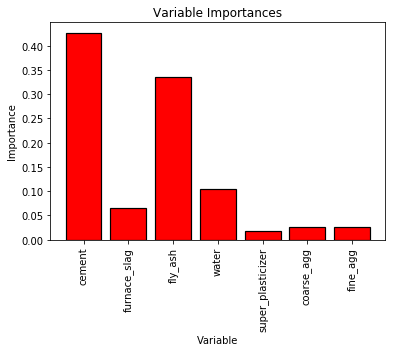

In [49]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

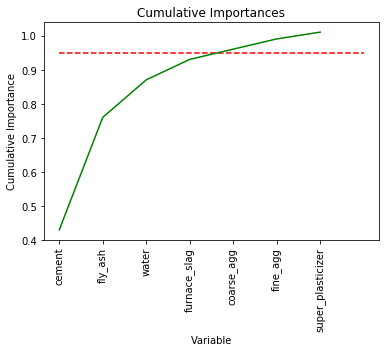

In [50]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [51]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 5


# Questions - Part 4

Next, create a random forest model that can reasonably predict CS using any/all of the input measurement features. 

Generate a visual representation of your random forest model and include the test set root mean square error (RMSE).

### • How many trees does your model include? How did you determine the number of trees to include?

There 80 trees in the Random Forest Classifier. Our random forest meta estimator has aggregated the results of 80 
simpler estimators. We used n_estimators parameter to get he number of trees in the forest.

Link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### •How many features does your model account for? How did you determine how many features to account for?

We have used all 7 features listed below in our model.


feature_list = ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer','coarse_agg', 'fine_agg']

We could have eliminated a few and tried to build different models. At the end we have found the most important features and also that 5 features contribute to 95% prediction in our model. We can try another model with these 5 features.

# Questions - Part 5

Last, think through additional analyses you might perform on the dataset if you were given more time (no additional analyses required).

### •	What alternative methods might you use to predict CS?

- Regression: Polynomial, SVM, Ridge and Lasso
- Boosting Algorithms: AdaBoost, Gradient Boosting and XGBoost
- Artificial Neural networks (might need more datapoints than now to tune the network properly)

### •	What additional data, not included in the dataset, might help better predict CS?

- First of all, we have a very small dataset on which proper train/validation/test splitting is almost questionable.If we can get more datapoints that can be helpful.
- Some external points of data such as temperature and other environmental conditions, cement content properties, mechanical strength properties, etc. could be included.

### •	Based on the EDA you completed in the first step, what additional analyses might you complete based on the data structure?

Data Preprocessing and feature engineering are the two things that can help in building better models.

- Looking at the distributions, we can see not all input features are normally distributed with couple of them being bimodel. We can apply transformations on these features.

- Some variables are correlated significantly (water and fly_ash, water and coarse_agg, coarse agg and fine_agg). This might give rise to multicollinearity and that must be fixed before making the models.

- A key factor in concrete engineering is the water-cement ratio. We can calculate more ratios involving our features and build different models involving those ratios. Later we can measure the model performance and discuss with domain experts to decide which onces are most important.

### •	What applications might your analysis lead to? In plain English, describe what business value these models could provide to a prospective client.

#### o	Your response can apply to either the models included in this task or any additional analyses proposed above.

Concrete is one of preferred choice among contractors and builders for construction projects. The right combination 
of constituents is important to get premium quality concrete mix. Reliability and durability are things that cannot
be compromised upon in infrastructre projects.

Using Machine Learning models, we were able to deduce importance of concrete mix constituents on compressive strength.
In Random Forest model, the feature importance showed that cement, fly_ash and water are key ingredients that affect
compressive strength. 

Already such inferences can provide a lot of business value to a prospective client. More research and work with
engineers can add tremendous value by finding answers to problems.

References: 

(1) https://pdfs.semanticscholar.org/1d57/698f6be2936b7bea529b10896fca03031492.pdf

(2) https://www.simonwenkel.com/2018/08/09/revisiting_ml_datasets_concrete_slump_test.html